In [1]:
import numpy as np

In [14]:
a = np.poly1d([1, 1])
b = np.poly1d([1, -1])

In [15]:
a, b

(poly1d([1, 1]), poly1d([ 1, -1]))

In [16]:
a*b

poly1d([ 1,  0, -1])

In [13]:
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

## Cost Function

#### 최솟값

In [20]:
# symbolic 연산

import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94*theta + 62, theta)
diff_th

76*theta - 94

In [21]:
94/76

1.236842105263158

--> 최솟값: 1.2

### Cost Function
: 에러를 표현하는 도구
* Gradient desent: 미분을 통해 cost function의 최솟값 찾음
* Learning Rate

## Boston 집값 예측

In [25]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
boston = X

In [35]:
[each for each in boston.keys()]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [36]:
'''
# pandas로 정리
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd['PRICE'] = boston.target
'''

"\n# pandas로 정리\nimport pandas as pd\n\nboston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)\nboston_pd['PRICE'] = boston.target\n"

In [94]:
boston_pd = boston.copy()

In [95]:
boston_pd['PRICE'] = y

In [97]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [98]:
# Price 에 대한 histogram

import plotly.express as px

fig = px.histogram(boston_pd, x='PRICE')
fig.show()

In [99]:
# 상관계수 
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston_pd.corr().round(1)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


In [100]:
corr_mat>0.5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,True,False,False,False,False,False,False,False,True,True,False,False,False,False
ZN,False,True,False,False,False,False,False,True,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,True,False,True,True,False,False,True,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,True,True,False,False,True,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,True
AGE,False,False,True,False,True,False,True,False,False,False,False,False,True,False
DIS,False,True,False,False,False,False,False,True,False,False,False,False,False,False
RAD,True,False,True,False,True,False,False,False,True,True,False,False,False,False
TAX,True,False,True,False,True,False,False,False,True,True,False,False,False,False


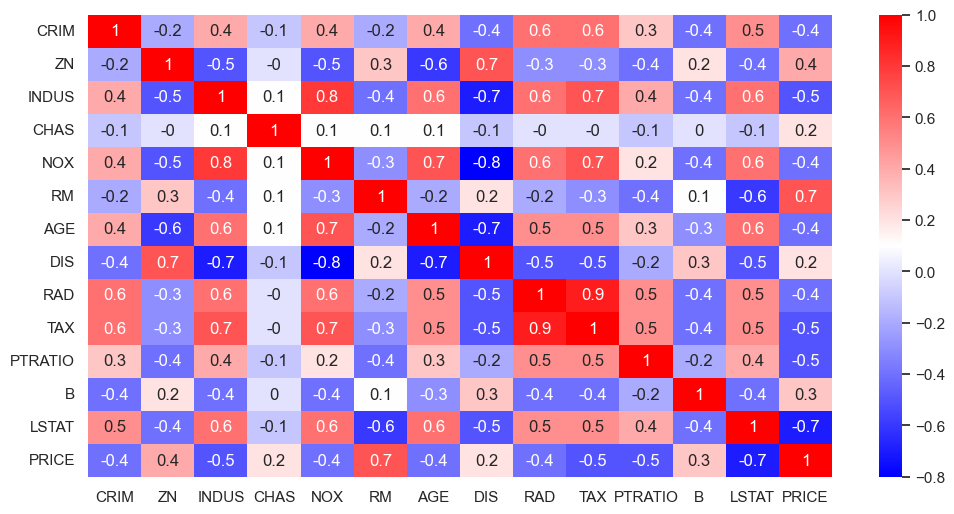

In [101]:
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

--> Price와 방의 수(RM), 저소득층 인구(LSTAT)와 높은 상관관계가 보임

<Axes: xlabel='LSTAT', ylabel='PRICE'>

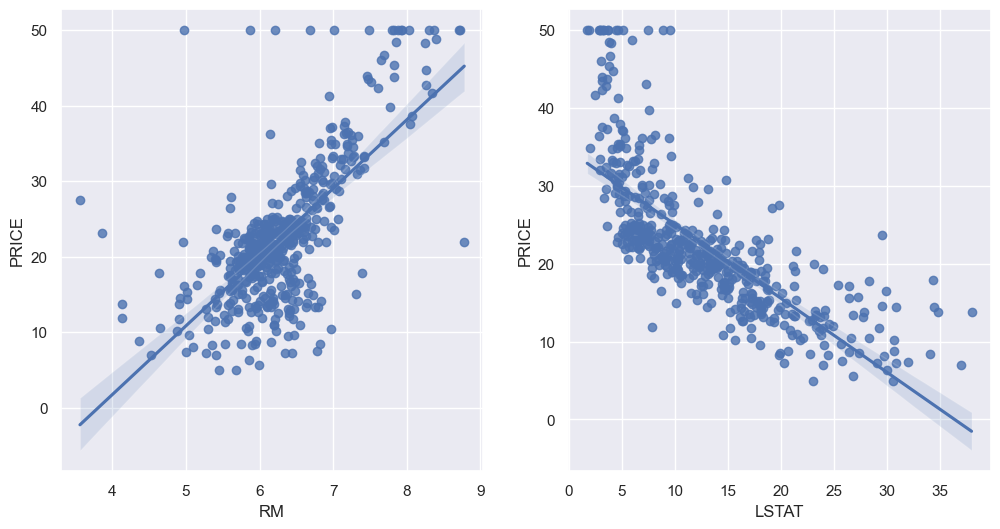

In [102]:
# RM과 LSTAT 와 PRICE의 관계에 대해 좀 더 관찰
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])

* train, test 나누기

In [122]:
# 두 column 이 data type = category 라서 reg.predict 안됐음

boston_pd['RAD'] = boston_pd['RAD'].astype('float')
boston_pd['CHAS'] = boston_pd['CHAS'].astype('float')

In [123]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [124]:
# train, test set 나누기
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

* linear regression model 학습

In [125]:
# LinearRegression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

* 평가(RMS)

In [126]:
# 모델 평가: RMS
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.642806069019824
RMSE of Test Data:  4.931352584146708


* 성능 확인

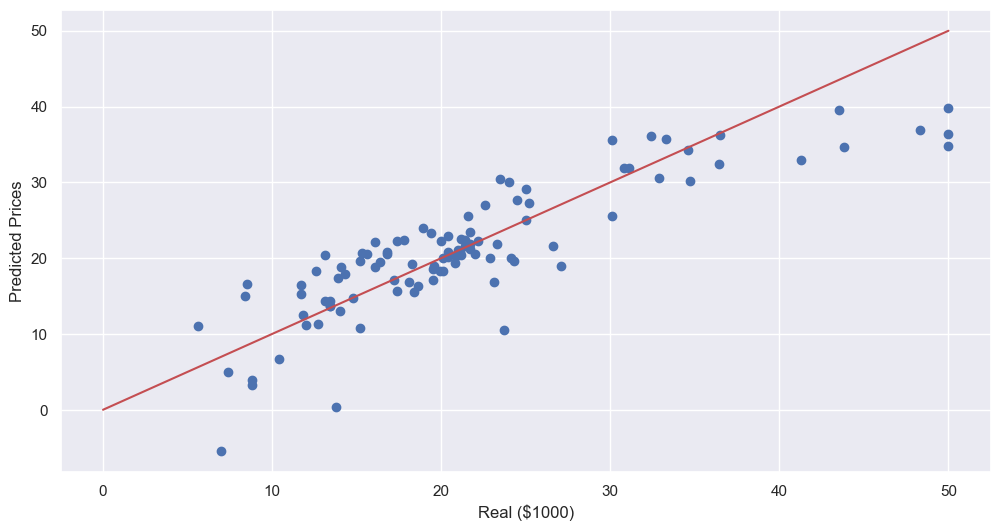

In [130]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real ($1000)')
plt.ylabel('Predicted Prices')
plt.plot([0, 50], [0, 50], 'r')
plt.show()

* LSTAT 빼고 테스트해보기

In [131]:
# train, test set 나누기

X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [132]:
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  5.165137874244864
RMSE of Test Data:  5.295595032597158


--> RMSE 올라감, 성능 나빠짐 -> 뺴도 될지는 분석자 판단

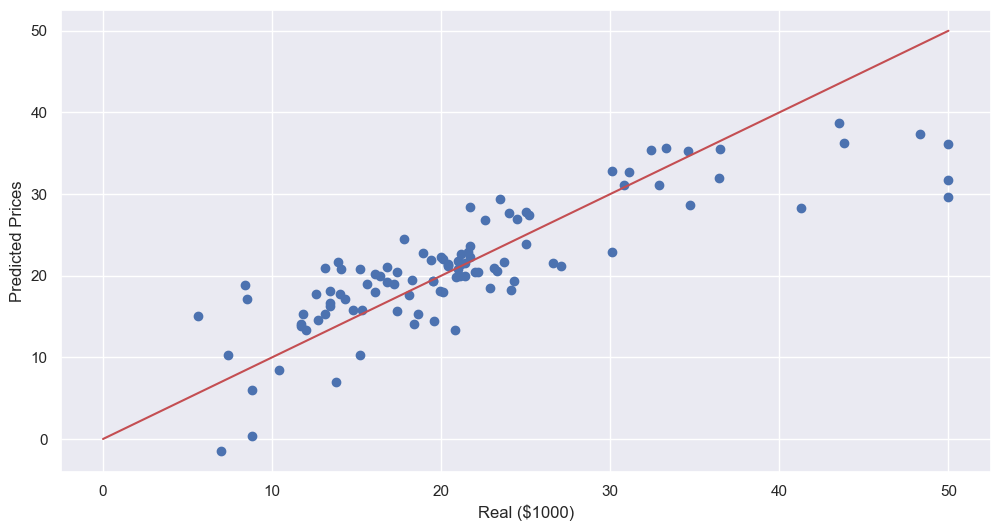

In [133]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real ($1000)')
plt.ylabel('Predicted Prices')
plt.plot([0, 50], [0, 50], 'r')
plt.show()